In [12]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [13]:
from fastai import *
from fastai.vision import *

In [14]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

# Initialize data set

In [15]:
path = Path('data')

In [18]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

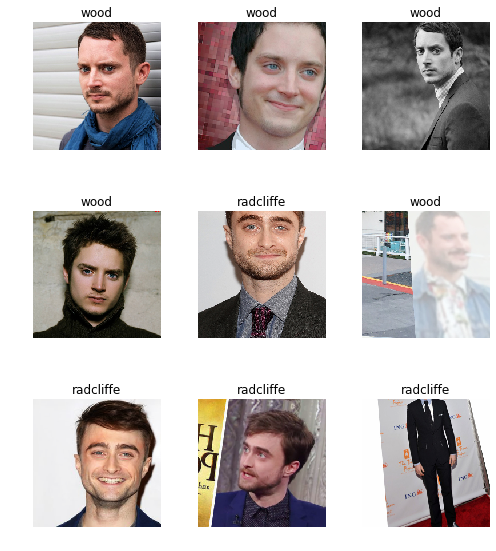

In [19]:
data.show_batch(rows=3, figsize=(7,8))

# Training the model (resnet34)

In [7]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/bpc_msds2019/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:11<00:00, 7935944.62it/s] 


In [8]:
learn.fit_one_cycle(4)

Total time: 11:58
epoch  train_loss  valid_loss  error_rate
1      0.778091    0.706071    0.438356    (02:34)
2      0.655916    0.689187    0.328767    (03:15)
3      0.543380    0.598731    0.287671    (03:15)
4      0.496114    0.524078    0.246575    (02:52)



In [9]:
learn.save('stage-1')

# Results

In [10]:
interp = ClassificationInterpretation.from_learner(learn)

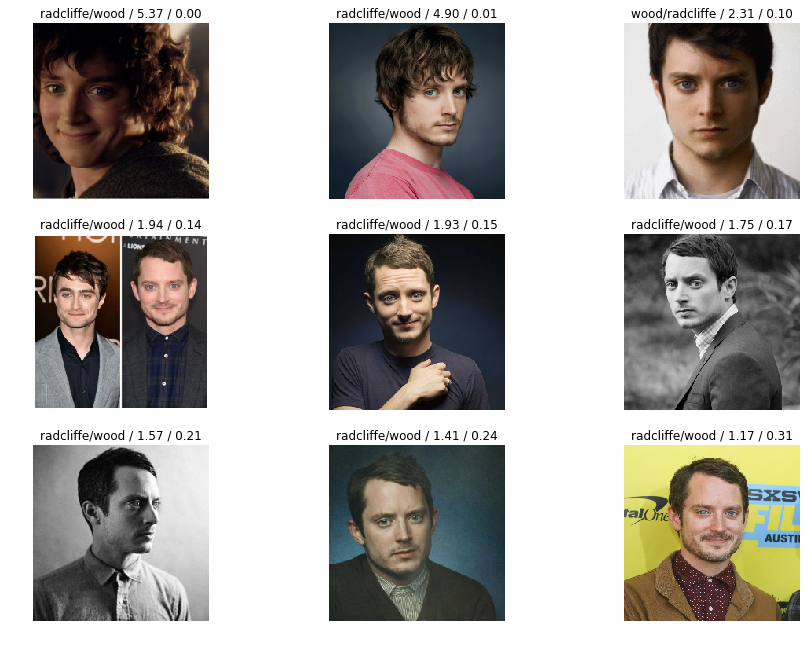

In [11]:
interp.plot_top_losses(9, figsize=(15,11))